In [1]:
df_raw = pd.read_csv('../train.csv')

In [2]:
df11 = pd.read_csv('test_int.csv')
df11.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,SalePrice
0,7,1710,2,548,856,856,2,8,2003,2003,208500
1,6,1262,2,460,1262,1262,2,6,1976,1976,181500
2,7,1786,2,608,920,920,2,6,2001,2002,223500
3,7,1717,3,642,756,961,1,7,1915,1970,140000
4,8,2198,3,836,1145,1145,2,9,2000,2000,250000


In [3]:
df22 = pd.read_csv('test_str.csv')
df22.head()

,NeighborhoodGrade,ExterQualGrade,KitchenQualGrade,BsmtQualGrade,SalePrice
0,17,3,3,3.0,208500
1,20,2,2,3.0,181500
2,17,3,3,3.0,223500
3,19,2,3,2.0,140000
4,24,3,3,3.0,250000


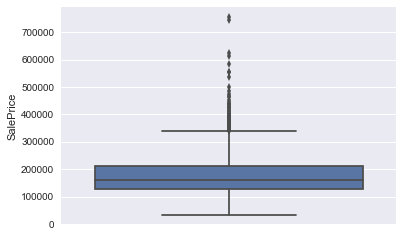

In [5]:
%matplotlib inline

sns.boxplot(y="SalePrice", data=df_raw) ## SalePrice의 데이터 분포 시각화2
plt.show()

In [7]:
import matplotlib.pyplot as plt
def IQEcheck(col):            ## IQE를 계산 및 box플롯의 정보
    q1 =col.quantile(q=0.25)
    q3 =col.quantile(q=0.75)
    iqr = q3 -q1
    upper = q3 + 1.5*iqr      ## upper 이상은 outlier
    lower = q1 - 1.5*iqr    
    print('median : ',col.median())   
    print('Q1 :',q1)    
    print('Q3 :',q3)
    print('upper :',upper)

IQEcheck(df_raw['SalePrice'])

median :  163000.0
Q1 : 129975.0
Q3 : 214000.0
upper : 340037.5


In [8]:
len(df_raw)

1460

In [25]:
outlier_ls=[]
for idx in range(len(df_raw)):
    if df_raw['SalePrice'][idx] > 340037.5 :
        outlier_ls.append(idx)
len(outlier_ls)

61

In [28]:
df22.iloc[2,:]

NeighborhoodGrade        17.0
ExterQualGrade            3.0
KitchenQualGrade          3.0
BsmtQualGrade             3.0
SalePrice            223500.0
Name: 2, dtype: float64

In [33]:
df_deloutlier = df_raw.drop(outlier_ls)

In [35]:
df_deloutlier.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
